# Let's apply PCA to analyze voting patterns

In [1]:
import matplotlib
matplotlib.use('nbagg')
%matplotlib inline

In [2]:
import graphlab as gl

### Load reviews data using SFrame's powerful unstructured data handling capabilities

In [3]:
reviews = gl.SFrame.read_csv('../data/yelp/yelp_training_set_review.json', header=False)
reviews = reviews.unpack('X1','')
reviews = reviews.unpack('votes', '')
reviews['total_votes'] = reviews['funny'] + reviews['cool'] + reviews['useful']
reviews

[INFO] This commercial license of GraphLab Create is assigned to engr@turi.com.

[INFO] Start server at: ipc:///tmp/graphlab_server-28311 - Server binary: /Users/alicez/.graphlab/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1443318612.log
[INFO] GraphLab Server Version: 1.6.1


PROGRESS: Finished parsing file /Users/alicez/Documents/training/Strata NYC 2015/data/yelp/yelp_training_set_review.json
PROGRESS: Parsing completed. Parsed 100 lines in 0.898333 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[dict]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Read 55824 lines. Lines per second: 32774.1
PROGRESS: Finished parsing file /Users/alicez/Documents/training/Strata NYC 2015/data/yelp/yelp_training_set_review.json
PROGRESS: Parsing completed. Parsed 229907 lines in 4.57022 secs.


business_id,date,review_id,stars,text,type
9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here onmy birthday for break ...,review
ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why somepeople give bad reviews ...,review
6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Riceis so good and I also ...,review
_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVEChaparral Dog Park!!! ...",review
6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager ScottPetello is a good egg!!! ...,review
-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simplyput, beautiful. Full ...",review
zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doingand drive here. After I ...,review
hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have totravel far to make my ...",review
wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happyhour! Prices are amaz ...,review
nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his uniquetalents with everything ...,review


# PCA

In [4]:
from sklearn.decomposition import PCA
import pandas as pd

#### Convert to Pandas Dataframe for PCA

In [5]:
data = reviews[['funny','cool','useful']].to_dataframe()

#### Run PCA

In [6]:
pca = PCA(n_components=3)
pca.fit(data)

PCA(copy=True, n_components=3, whiten=False)

#### Matplotlib Incantations

In [7]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_figs(ax, data, pca):
    ax.set_xlabel('funny')
    ax.set_ylabel('cool')
    ax.set_zlabel('useful')
    a = data.funny - data.funny.mean()
    b = data.cool - data.cool.mean()
    c = data.useful - data.useful.mean()
    ax.scatter(a[::20], b[::20], c[::20], marker='+', alpha=1)

    pca_score = pca.explained_variance_ratio_
    V = pca.components_

    x_pca_axis, y_pca_axis, z_pca_axis = 2 * V.T * pca_score / pca_score.min()
    ax.plot(xs=(0, x_pca_axis[0]), ys=(0, y_pca_axis[0]), zs=(0, z_pca_axis[0]), color='r', linewidth=4)
    ax.plot(xs=(0, x_pca_axis[1]), ys=(0, y_pca_axis[1]), zs=(0, z_pca_axis[1]), color='g', linewidth=4)
    ax.plot(xs=(0, x_pca_axis[2]), ys=(0, y_pca_axis[2]), zs=(0, z_pca_axis[2]), color='y', linewidth=4)
    return None

### Make pretty PCA Pictures

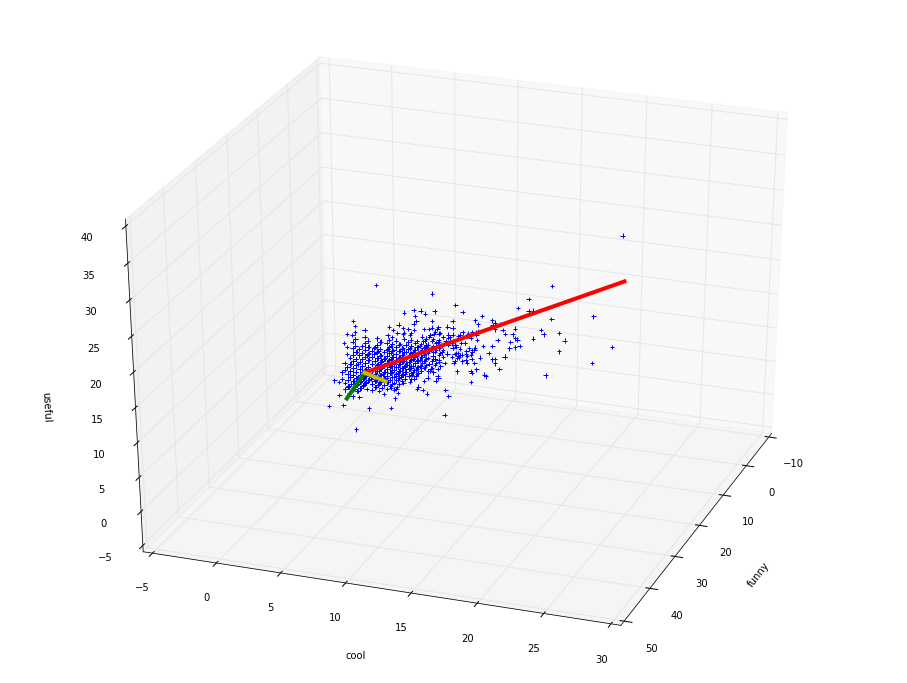

In [8]:
elev = 30
azim = 20
fig = plt.figure(1, figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev, azim)
plot_figs(ax, data, pca)

### But Really, the objective is interpretation

In [9]:
pca = PCA(4)
pca.fit(reviews[['funny','cool','useful','stars']].to_dataframe())
print(pca.explained_variance_ratio_) 
pca.components_

[ 0.77406014  0.11124671  0.08121511  0.03347804]


array([[ 0.50067068,  0.5692005 ,  0.65214322, -0.00699229],
       [ 0.19674739, -0.15560552, -0.02560983, -0.96768875],
       [-0.81047211,  0.08415487,  0.54670603, -0.19278336],
       [-0.23184971,  0.80294189, -0.52456256, -0.16237045]])

### Let's try to interpret this.


#### 1st Component
The primary component says that most of variation in the data (77%), is explained reviews which are funny, cool, useful, but has nothing to do with stars. In other words, funny, cool, useful are correlated, but the amount of those votes does not tell you anything about stars.


#### 2nd Component
The second component explains 11% of the variation of the data and it says that "funny reviews" are anti-correlated with "stars" and somewhat anti-correlated with "cool". There's a nearly negligible negative correlation with "useful." 